In [1]:
import requests as req
import json
import tqdm
import pandas as pd
import altair as alt
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [2]:
# Episcanner data
linkEpiscanner = 'https://api.mosqlimate.org/api/datastore/episcanner/?disease=dengue&uf=RJ&year=2023'
episData = pd.read_json(linkEpiscanner)
episData

,disease,CID10,year,geocode,muni_name,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,ep_ini,ep_end,ep_dur
0,dengue,A90,2023,3302502,Magé,23.015188,0.430663,0.302196,1.425109,388.780718,0.298299,1.497483,202246,202335,41
1,dengue,A90,2023,3304151,Quissamã,15.824734,0.584920,0.318455,1.836744,580.333978,0.455558,0.824702,202246,202320,26
2,dengue,A90,2023,3305752,Tanguá,20.670888,0.521295,0.300000,1.737650,108.535013,0.424510,2.765660,202248,202326,30
3,dengue,A90,2023,3302205,Itaperuna,19.410199,0.485169,0.300000,1.617231,3607.126503,0.381659,1.360677,202246,202327,33
4,dengue,A90,2023,3303104,Natividade,24.131295,0.639381,0.300000,2.131270,759.616593,0.530796,1.261932,202306,202326,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,dengue,A90,2023,3301702,Duque de Caxias,23.461672,0.487198,0.326559,1.491917,2191.909554,0.329721,0.906275,202246,202332,38
57,dengue,A90,2023,3300407,Barra Mansa,22.264514,0.535282,0.300171,1.783258,120.228903,0.439229,1.126423,202251,202327,28
58,dengue,A90,2023,3302452,Macuco,24.409328,0.630917,0.300713,2.098074,222.458794,0.523372,0.491757,202306,202327,21
59,dengue,A90,2023,3304102,Porciúncula,16.406750,0.639761,0.328280,1.948827,629.323338,0.486871,0.833894,202249,202319,22


In [3]:
# Infodengue data
linkInfodengue = 'https://api.mosqlimate.org/api/datastore/infodengue/?disease=dengue&start=2023-01-01&end=2024-01-01&uf=RJ&per_page=100'
init = req.get(linkInfodengue).json()
total_pages = init['pagination']['total_pages'] 
init, total_pages

({'items': [{'data_iniSE': '2023-12-31',
    'SE': 202401,
    'casos_est': 0.0,
    'casos_est_min': 0,
    'casos_est_max': 0,
    'casos': 0,
    'municipio_geocodigo': 3304607,
    'p_rt1': 0.0,
    'p_inc100k': 0.0,
    'Localidade_id': 0,
    'nivel': 1,
    'id': 330460720240119905,
    'versao_modelo': '2024-07-01',
    'Rt': 0.0,
    'municipio_nome': 'Santa Maria Madalena',
    'pop': 9704.0,
    'tempmin': 23.7647058823529,
    'umidmax': 90.6269407058824,
    'receptivo': 0,
    'transmissao': 0,
    'nivel_inc': 0,
    'umidmed': 90.6269407058824,
    'umidmin': 90.6269407058824,
    'tempmed': 23.7647058823529,
    'tempmax': 23.7647058823529,
    'casprov': 0,
    'casprov_est': None,
    'casprov_est_min': None,
    'casprov_est_max': None,
    'casconf': None},
   {'data_iniSE': '2023-12-31',
    'SE': 202401,
    'casos_est': 0.0,
    'casos_est_min': 0,
    'casos_est_max': 0,
    'casos': 0,
    'municipio_geocodigo': 3300506,
    'p_rt1': 0.0,
    'p_inc100k': 0.0,

In [4]:
# Loading Infodengue data for each page
l = []
for a in tqdm.tqdm(range(1,total_pages+1)):
    l = l + req.get(linkInfodengue+f'&page={a}').json()['items']

infoData = pd.DataFrame(l)
infoData

  0%|          | 0/49 [00:00<?, ?it/s]

100%|██████████| 49/49 [01:19<00:00,  1.63s/it]


,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,...,nivel_inc,umidmed,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf
0,2023-12-31,202401,0.0,0,0,0,3304607,0.000000,0.000000,0,...,0,90.626941,90.626941,23.764706,23.764706,0.0,None,None,None,None
1,2023-12-31,202401,0.0,0,0,0,3300506,0.000000,0.000000,0,...,0,87.949531,87.595370,23.783333,24.000000,0.0,None,None,None,None
2,2023-12-31,202401,5.0,5,5,5,3304300,0.748414,9.079683,0,...,1,80.487819,79.301623,25.119048,25.190476,4.0,None,None,None,None
3,2023-12-31,202401,2412.0,2412,2412,2412,3304557,1.000000,36.402880,0,...,2,77.966467,77.847939,24.904762,25.000000,1502.0,None,None,None,None
4,2023-12-31,202401,25.0,25,25,25,3305703,0.999191,136.716610,0,...,2,87.949531,87.595370,23.783333,24.000000,12.0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,2023-01-01,202301,1.0,1,1,1,3300308,0.730488,0.992418,0,...,0,82.742929,69.508918,24.398809,27.714286,NaN,None,None,None,None
4872,2023-01-01,202301,10.0,10,10,10,3301876,0.799091,34.677670,0,...,1,81.771630,72.527007,24.854762,27.000000,NaN,None,None,None,None
4873,2023-01-01,202301,2.0,2,2,2,3301504,0.966188,9.073998,0,...,0,85.320954,62.684184,25.934524,31.428571,NaN,None,None,None,None
4874,2023-01-01,202301,2.0,2,2,2,3304805,0.977954,5.166624,0,...,0,78.500885,65.518146,26.142857,29.000000,NaN,None,None,None,None


In [5]:
# Duplicated data
infoData[infoData.duplicated()]

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,...,nivel_inc,umidmed,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf
1501,2023-09-10,202337,1.0,1,1,1,3303807,0.675729,1.976597,0,...,0,63.877932,48.685961,21.068027,25.714286,1.0,None,None,None,None
1502,2023-09-10,202337,0.0,0,0,0,3303708,0.000000,0.000000,0,...,0,77.312465,70.757445,19.666667,20.500000,0.0,None,None,None,None
1510,2023-09-10,202337,3.0,3,3,3,3301504,0.942174,14.393321,0,...,0,92.880584,88.378237,18.854167,20.000000,2.0,None,None,None,None
1514,2023-09-10,202337,17.0,17,17,17,3301900,0.509320,7.359180,0,...,1,77.312465,70.757445,19.666667,20.500000,13.0,None,None,None,None
1518,2023-09-10,202337,1.0,1,1,1,3301801,0.779804,8.458806,0,...,0,NaN,NaN,NaN,NaN,0.0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4827,2023-01-01,202301,0.0,0,0,0,3303203,0.000000,0.000000,0,...,0,78.188093,63.034302,24.976191,28.428571,NaN,None,None,None,None
4838,2023-01-01,202301,2.0,2,2,2,3302056,0.858608,13.072750,0,...,0,78.500885,65.518146,26.142857,29.000000,NaN,None,None,None,None
4843,2023-01-01,202301,2.0,2,2,2,3303302,0.584746,0.388111,0,...,0,78.188093,63.034302,24.976191,28.428571,NaN,None,None,None,None
4845,2023-01-01,202301,1.0,1,1,1,3303005,0.550619,3.682699,0,...,0,78.500885,65.518146,26.142857,29.000000,NaN,None,None,None,None


In [6]:
# ~~~~Epidemologic Year
infoData.SE.apply(lambda x:x//100)

0       2024
1       2024
2       2024
3       2024
4       2024
        ... 
4871    2023
4872    2023
4873    2023
4874    2023
4875    2023
Name: SE, Length: 4876, dtype: int64

In [7]:
# Drop Duplicates
infoData = infoData.drop_duplicates().reset_index(drop=True)
# Epidemiologic Year
infoData['year'] = infoData.SE.apply(lambda x:x//100)
# Changes names
infoData = infoData.rename(columns={'municipio_geocodigo':'geocode', 'municipio_nome':'muni_name'})
infoData

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,geocode,p_rt1,p_inc100k,Localidade_id,...,umidmed,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,year
0,2023-12-31,202401,0.0,0,0,0,3304607,0.000000,0.000000,0,...,90.626941,90.626941,23.764706,23.764706,0.0,None,None,None,None,2024
1,2023-12-31,202401,0.0,0,0,0,3300506,0.000000,0.000000,0,...,87.949531,87.595370,23.783333,24.000000,0.0,None,None,None,None,2024
2,2023-12-31,202401,5.0,5,5,5,3304300,0.748414,9.079683,0,...,80.487819,79.301623,25.119048,25.190476,4.0,None,None,None,None,2024
3,2023-12-31,202401,2412.0,2412,2412,2412,3304557,1.000000,36.402880,0,...,77.966467,77.847939,24.904762,25.000000,1502.0,None,None,None,None,2024
4,2023-12-31,202401,25.0,25,25,25,3305703,0.999191,136.716610,0,...,87.949531,87.595370,23.783333,24.000000,12.0,None,None,None,None,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,2023-01-01,202301,0.0,0,0,0,3304110,0.000000,0.000000,0,...,86.592354,73.877175,22.744898,25.571429,NaN,None,None,None,None,2023
4374,2023-01-01,202301,1.0,1,1,1,3300308,0.730488,0.992418,0,...,82.742929,69.508918,24.398809,27.714286,NaN,None,None,None,None,2023
4375,2023-01-01,202301,10.0,10,10,10,3301876,0.799091,34.677670,0,...,81.771630,72.527007,24.854762,27.000000,NaN,None,None,None,None,2023
4376,2023-01-01,202301,2.0,2,2,2,3304805,0.977954,5.166624,0,...,78.500885,65.518146,26.142857,29.000000,NaN,None,None,None,None,2023


In [8]:
infoData.columns

Index(['data_iniSE', 'SE', 'casos_est', 'casos_est_min', 'casos_est_max',
       'casos', 'geocode', 'p_rt1', 'p_inc100k', 'Localidade_id', 'nivel',
       'id', 'versao_modelo', 'Rt', 'muni_name', 'pop', 'tempmin', 'umidmax',
       'receptivo', 'transmissao', 'nivel_inc', 'umidmed', 'umidmin',
       'tempmed', 'tempmax', 'casprov', 'casprov_est', 'casprov_est_min',
       'casprov_est_max', 'casconf', 'year'],
      dtype='object')

In [9]:
# Population finished year
pop = infoData[infoData.year==2023].loc[:,['geocode','muni_name','pop']].groupby('geocode').last().reset_index()

In [10]:
# Total cases for city
info = infoData.loc[:,['year','geocode','muni_name','casos']].groupby(['year','geocode','muni_name']).sum().reset_index()
info = info[info.year==2023]
info

,year,geocode,muni_name,casos
0,2023,3300100,Angra dos Reis,2870
1,2023,3300159,Aperibé,16
2,2023,3300209,Araruama,112
3,2023,3300225,Areal,8
4,2023,3300233,Armação dos Búzios,738
...,...,...,...,...
87,2023,3306008,Três Rios,1240
88,2023,3306107,Valença,71
89,2023,3306156,Varre-Sai,467
90,2023,3306206,Vassouras,205


In [11]:
# Merge Infodengue data and episcanner data
data = info.merge(episData)
data

,year,geocode,muni_name,casos,disease,CID10,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,ep_ini,ep_end,ep_dur
0,2023,3300100,Angra dos Reis,2870,dengue,A90,25.551014,0.464784,0.300000,1.549280,2467.574641,0.354539,2.234575,202246,202335,41
1,2023,3300209,Araruama,112,dengue,A90,33.927833,0.419641,0.307120,1.366373,65.598642,0.268135,1.775199,202246,202344,50
2,2023,3300233,Armação dos Búzios,738,dengue,A90,28.482645,0.504102,0.302101,1.668654,684.259191,0.400715,1.504273,202302,202335,33
3,2023,3300258,Arraial do Cabo,120,dengue,A90,33.389751,0.440091,0.313031,1.405903,128.230536,0.288714,1.255914,202247,202344,49
4,2023,3300407,Barra Mansa,121,dengue,A90,22.264514,0.535282,0.300171,1.783258,120.228903,0.439229,1.126423,202251,202327,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2023,3306008,Três Rios,1240,dengue,A90,28.865539,0.479016,0.300014,1.596644,753.783111,0.373686,1.649139,202252,202337,37
57,2023,3306107,Valença,71,dengue,A90,25.486988,0.423258,0.305895,1.383670,63.883349,0.277284,1.760782,202246,202339,45
58,2023,3306156,Varre-Sai,467,dengue,A90,19.983736,0.692394,0.323495,2.140357,644.114907,0.532788,1.238585,202303,202321,18
59,2023,3306206,Vassouras,205,dengue,A90,22.395296,0.519611,0.315839,1.645177,190.153081,0.392163,1.675169,202248,202329,33


In [12]:
# merges data and population data
data = data.merge(pop)
data

,year,geocode,muni_name,casos,disease,CID10,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,ep_ini,ep_end,ep_dur,pop
0,2023,3300100,Angra dos Reis,2870,dengue,A90,25.551014,0.464784,0.300000,1.549280,2467.574641,0.354539,2.234575,202246,202335,41,207044.0
1,2023,3300209,Araruama,112,dengue,A90,33.927833,0.419641,0.307120,1.366373,65.598642,0.268135,1.775199,202246,202344,50,134293.0
2,2023,3300233,Armação dos Búzios,738,dengue,A90,28.482645,0.504102,0.302101,1.668654,684.259191,0.400715,1.504273,202302,202335,33,34477.0
3,2023,3300258,Arraial do Cabo,120,dengue,A90,33.389751,0.440091,0.313031,1.405903,128.230536,0.288714,1.255914,202247,202344,49,30593.0
4,2023,3300407,Barra Mansa,121,dengue,A90,22.264514,0.535282,0.300171,1.783258,120.228903,0.439229,1.126423,202251,202327,28,184833.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2023,3306008,Três Rios,1240,dengue,A90,28.865539,0.479016,0.300014,1.596644,753.783111,0.373686,1.649139,202252,202337,37,82142.0
57,2023,3306107,Valença,71,dengue,A90,25.486988,0.423258,0.305895,1.383670,63.883349,0.277284,1.760782,202246,202339,45,76869.0
58,2023,3306156,Varre-Sai,467,dengue,A90,19.983736,0.692394,0.323495,2.140357,644.114907,0.532788,1.238585,202303,202321,18,11106.0
59,2023,3306206,Vassouras,205,dengue,A90,22.395296,0.519611,0.315839,1.645177,190.153081,0.392163,1.675169,202248,202329,33,37083.0


In [13]:
# creates diff and diff normalizate
data['diff'] = data['total_cases'] - data['casos']
data['diff_n100k'] = data['diff']/data['pop']*100000
data

,year,geocode,muni_name,casos,disease,CID10,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,ep_ini,ep_end,ep_dur,pop,diff,diff_n100k
0,2023,3300100,Angra dos Reis,2870,dengue,A90,25.551014,0.464784,0.300000,1.549280,2467.574641,0.354539,2.234575,202246,202335,41,207044.0,-402.425359,-194.367071
1,2023,3300209,Araruama,112,dengue,A90,33.927833,0.419641,0.307120,1.366373,65.598642,0.268135,1.775199,202246,202344,50,134293.0,-46.401358,-34.552328
2,2023,3300233,Armação dos Búzios,738,dengue,A90,28.482645,0.504102,0.302101,1.668654,684.259191,0.400715,1.504273,202302,202335,33,34477.0,-53.740809,-155.874376
3,2023,3300258,Arraial do Cabo,120,dengue,A90,33.389751,0.440091,0.313031,1.405903,128.230536,0.288714,1.255914,202247,202344,49,30593.0,8.230536,26.903332
4,2023,3300407,Barra Mansa,121,dengue,A90,22.264514,0.535282,0.300171,1.783258,120.228903,0.439229,1.126423,202251,202327,28,184833.0,-0.771097,-0.417186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2023,3306008,Três Rios,1240,dengue,A90,28.865539,0.479016,0.300014,1.596644,753.783111,0.373686,1.649139,202252,202337,37,82142.0,-486.216889,-591.922389
57,2023,3306107,Valença,71,dengue,A90,25.486988,0.423258,0.305895,1.383670,63.883349,0.277284,1.760782,202246,202339,45,76869.0,-7.116651,-9.258154
58,2023,3306156,Varre-Sai,467,dengue,A90,19.983736,0.692394,0.323495,2.140357,644.114907,0.532788,1.238585,202303,202321,18,11106.0,177.114907,1594.767753
59,2023,3306206,Vassouras,205,dengue,A90,22.395296,0.519611,0.315839,1.645177,190.153081,0.392163,1.675169,202248,202329,33,37083.0,-14.846919,-40.036995


<Axes: >

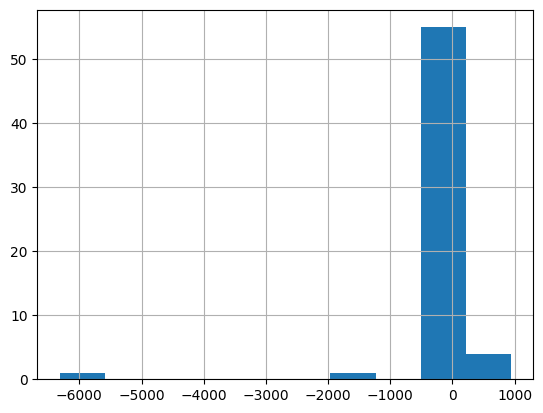

In [14]:
data['diff'].hist()

<Axes: >

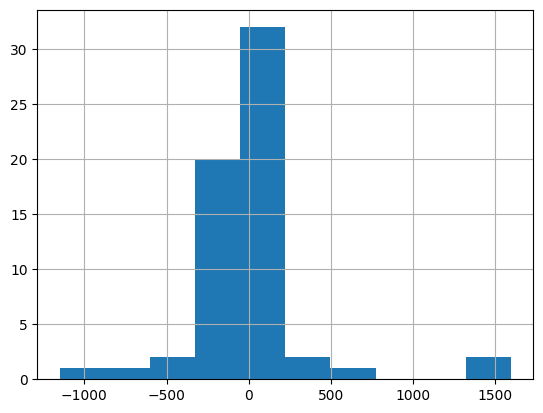

In [15]:
data['diff_n100k'].hist()

In [16]:
c = ['#cb2b2b', '#d1590c', '#cd8000', '#bfa400', '#a8c51c', '#79cd56', '#48d085', '#00d0ad', '#00b4ca', '#0093e8', '#006aea', '#4028bf']

In [17]:
c[::2]

['#cb2b2b', '#cd8000', '#a8c51c', '#48d085', '#00b4ca', '#006aea']

# Jenks

In [18]:
#pip install jenkspy

In [19]:
import jenkspy
import numpy as np

In [20]:
jenksBreak = jenkspy.jenks_breaks(data.diff_n100k, n_classes=5)
jenksBreak

[-1149.1015112140135,
 -591.9223887342242,
 -87.61249817584934,
 186.00024637593486,
 622.81061905705,
 1594.7677530015535]

In [32]:
states = alt.topo_feature('https://servicodados.ibge.gov.br/api/v3/malhas/estados/33?formato=application/json&qualidade=maxima&intrarregiao=municipio', feature='UF33MU')

m_0 = alt.Chart(states).mark_geoshape(fill='#bbb', stroke='#666')

m = alt.Chart(data, width = 400,height=320).mark_geoshape(
    stroke='#666'
).transform_lookup(
    lookup='geocode', 
    from_=alt.LookupData(states, key='properties.codarea', fields=['geometry', 'type'])
    ).encode(
        color=alt.Color('diff_n100k:Q', 
                        scale=alt.Scale(type='threshold', domain=np.round(jenksBreak[1:-1],2),range=['#cb2b2b', '#dc7080', '#48d085', '#00b4ca', '#006aea']),#['#d7191c','#fdae61','#ffffbf','#abdda4','#2b83ba']),#['#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac']),#['#f33','#f66','#9F9','#66f','#44F']), 
                        legend=alt.Legend(title=['Diferença Normalizada pela população-100k','Casos pevistos Episcanner - Casos reais'], orient='top-left', direction='horizontal',gradientLength=500,symbolLimit=300,
                        gradientThickness=17,labelFontSize=8,titleFontSize=10,titleLimit=350)),
        tooltip=['muni_name:N', 'casos:Q', 'total_cases:Q','diff_n100k']
    )

(m_0+m)

alt.LayerChart(...)

In [33]:
jenksBreak_ = jenkspy.jenks_breaks(np.abs(data.diff_n100k), n_classes=3)
jenksBreak_

[0.332083303106402, 249.45294722145601, 839.6258361135164, 1594.7677530015535]

In [34]:
[-jenksBreak_[2],-jenksBreak_[1],jenksBreak_[1],jenksBreak_[2]]

[-839.6258361135164,
 -249.45294722145601,
 249.45294722145601,
 839.6258361135164]

In [35]:
states = alt.topo_feature('https://servicodados.ibge.gov.br/api/v3/malhas/estados/33?formato=application/json&qualidade=maxima&intrarregiao=municipio', feature='UF33MU')

m_0 = alt.Chart(states).mark_geoshape(fill='#bbb', stroke='#666')

m = alt.Chart(data, width = 400,height=320).mark_geoshape(
    stroke='#666'
).transform_lookup(
    lookup='geocode', 
    from_=alt.LookupData(states, key='properties.codarea', fields=['geometry', 'type'])
    ).encode(
        color=alt.Color('diff_n100k:Q', 
                        scale=alt.Scale(type='threshold', domain=np.round([-jenksBreak_[2],-jenksBreak_[1],jenksBreak_[1],jenksBreak_[2]],2),
                                        range=['#cb2b2b', '#dc7080', '#48d085', '#00b4ca', '#006aea']),#['#d7191c','#fdae61','#ffffbf','#abdda4','#2b83ba']),#['#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac']),#['#f33','#f66','#9F9','#66f','#44F']), 
                        legend=alt.Legend(title=['Diferença Normalizada pela população-100k','Casos pevistos Episcanner - Casos reais'], orient='top-left', direction='horizontal',gradientLength=500,symbolLimit=300,
                        gradientThickness=17,labelFontSize=8,titleFontSize=10,titleLimit=350)),
        tooltip=['muni_name:N', 'casos:Q', 'total_cases:Q','diff_n100k']
    )

#save.save((m_0+m),'jenks_refletido.png')
m_0+m

alt.LayerChart(...)

Creio que será necessário uma forma melhor de agrupar, pois acredito que seria bom manter uma simetria na coloração para melhor visualização do desempenho do modelo. Por hora, creio que valha a pena utilizar uma coloração padrão.

# Quebra Arbitrária

| -100 | -25 | 25 | 100 |

In [44]:
states = alt.topo_feature('https://servicodados.ibge.gov.br/api/v3/malhas/estados/33?formato=application/json&qualidade=maxima&intrarregiao=municipio', feature='UF33MU')

m_0 = alt.Chart(states).mark_geoshape(fill='#bbb', stroke='#666')

m = alt.Chart(data, width = 400,height=320).mark_geoshape(
    stroke='#666'
).transform_lookup(
    lookup='geocode', 
    from_=alt.LookupData(states, key='properties.codarea', fields=['geometry', 'type'])
    ).encode(
        color=alt.Color('diff_n100k:Q', 
                        scale=alt.Scale(type='threshold', domain=[-100,-25,25,100],range=['#cb2b2b', '#dc7080', '#48d085', '#00b4ca', '#006aea']),#['#d7191c','#fdae61','#ffffbf','#abdda4','#2b83ba']),#['#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac']),#['#f33','#f66','#9F9','#66f','#44F']), 
                        legend=alt.Legend(title=['Diferença Normalizada pela população-100k','Casos pevistos Episcanner - Casos reais'], orient='top-left', direction='horizontal',gradientLength=500,symbolLimit=300,
                        gradientThickness=17,labelFontSize=8,titleFontSize=10,titleLimit=350)),
        tooltip=['muni_name:N', 'casos:Q', 'total_cases:Q','diff_n100k']
    )

(m_0+m).save('arbitraria.html')
m_0+m

alt.LayerChart(...)

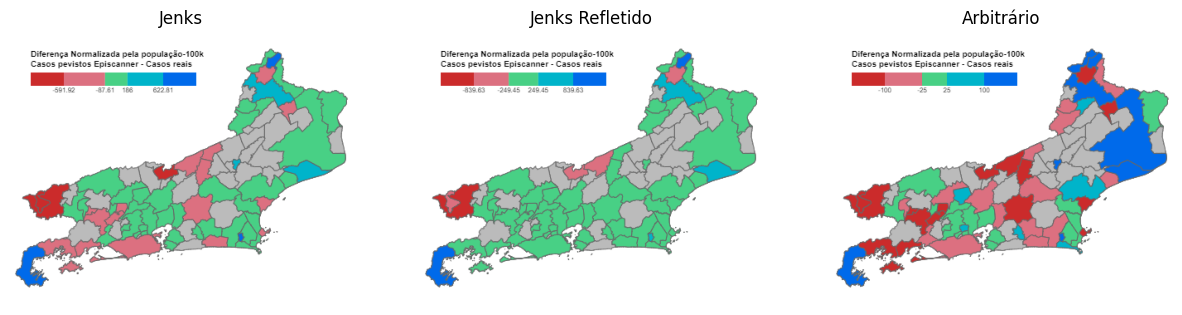

In [45]:
import matplotlib.pyplot as plt

jenks = plt.imread('jenks.png')
jenks_refletido = plt.imread('jenks_refletido.png')
arbitraria = plt.imread('arbitraria.png')

# Criar um subplot com 1 linha e 3 colunas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotar cada imagem em um subplot
axes[0].imshow(jenks)
axes[0].axis('off')  
axes[0].set_title('Jenks')

axes[1].imshow(jenks_refletido)
axes[1].axis('off')  
axes[1].set_title('Jenks Refletido')

axes[2].imshow(arbitraria)
axes[2].axis('off')  
axes[2].set_title('Arbitrário')

plt.show()